In [6]:
#import all the nessecary libraries 
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#reading the image
image=cv2.imread(r"C:\Users\hp\OneDrive\Desktop\colorful_img.jpg")

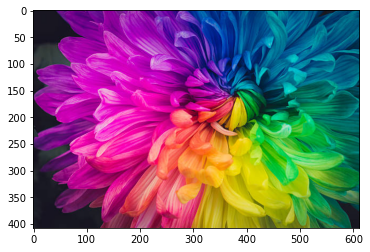

In [8]:
#changing the color of the image from BGR TO RGB
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [9]:
image

array([[[ 24,  22,  33],
        [ 24,  22,  33],
        [ 24,  22,  33],
        ...,
        [  0, 103, 128],
        [  0, 105, 129],
        [  0, 106, 130]],

       [[ 24,  22,  33],
        [ 24,  22,  33],
        [ 24,  22,  33],
        ...,
        [  3, 107, 136],
        [  1, 105, 134],
        [  0, 101, 131]],

       [[ 24,  22,  33],
        [ 24,  22,  33],
        [ 24,  22,  33],
        ...,
        [  0,  99, 131],
        [  0,  95, 127],
        [  0,  91, 124]],

       ...,

       [[ 35,  35,  45],
        [ 34,  34,  44],
        [ 33,  33,  43],
        ...,
        [ 23,  23,  33],
        [ 23,  23,  33],
        [ 23,  23,  33]],

       [[ 36,  36,  46],
        [ 35,  35,  45],
        [ 33,  33,  43],
        ...,
        [ 23,  23,  33],
        [ 23,  23,  33],
        [ 23,  23,  33]],

       [[ 36,  36,  46],
        [ 35,  35,  45],
        [ 34,  34,  44],
        ...,
        [ 23,  23,  33],
        [ 23,  23,  33],
        [ 23,  23,  33]]

In [10]:
#reshaping the data (image )into 2D 
pil_val=image.reshape((-1,3))
pil_val

array([[24, 22, 33],
       [24, 22, 33],
       [24, 22, 33],
       ...,
       [23, 23, 33],
       [23, 23, 33],
       [23, 23, 33]], dtype=uint8)

In [11]:
#converting it into float type
pil_val=np.float32(pil_val)
pil_val

array([[24., 22., 33.],
       [24., 22., 33.],
       [24., 22., 33.],
       ...,
       [23., 23., 33.],
       [23., 23., 33.],
       [23., 23., 33.]], dtype=float32)

In [12]:
#defines the criteria for the algorithm to stop running,which will happen is 100 iterations are run 
criteria=(cv2.TERM_CRITERIA_EPS +  cv2.TERM_CRITERIA_MAX_ITER,100,0.85)

In [37]:
k=4

In [38]:
# retreval,centres,labels=cv2.kmeans(pil_val, k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
retval, labels, centers = cv2.kmeans(pil_val, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [39]:
#covert the data into eight bits
centers=np.uint(centers)

segmented_data=centers[labels.flatten()]

In [40]:
#shaping  the data into the orginal dimention of the image to enable printing it

segmented_image=segmented_data.reshape(image.shape)

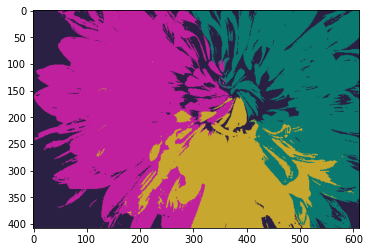

In [41]:
plt.imshow(segmented_image)

In [43]:
#Before we apply K-means to find the dominant colors, we need data pre-process

from scipy.cluster.vq import whiten
import pandas as pd

#construct to a dataframe for future data process
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,24,22,33
1,24,22,33
2,24,22,33
3,24,22,33
4,24,22,33


In [44]:
#data elements need to be standardized or whiten
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

,r,g,b,r_whiten,g_whiten,b_whiten
0,24,22,33,0.254872,0.329635,0.544623
1,24,22,33,0.254872,0.329635,0.544623
2,24,22,33,0.254872,0.329635,0.544623
3,24,22,33,0.254872,0.329635,0.544623
4,24,22,33,0.254872,0.329635,0.544623


In [45]:
#using kmeans from scipy for the data cluster
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 5)

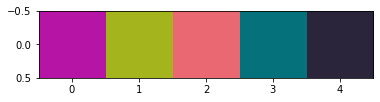

[(181, 20, 165), (164, 180, 29), (233, 104, 114), (5, 114, 123), (43, 37, 59)]

In [46]:
#Restore R, G, B
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()
colors